## PISA Survey

### Investigation Overview

Are there differences in achievement based on gender, location, wealth, or student attitudes?

Does there exist inequality in academic achievement?

<a id='intro'></a>
### Dataset Overview

I choose **PISA** Dataset to analyze. PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

In [4]:
#To get started, let's import our libraries. More may be imported when needed
#import the required pakages for our analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
#read the data 
df = pd.read_csv('pisa2012.csv')

C:\Users\engab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Let's discover the data set!

starting by its size

In [6]:
df.shape #really huge

(485490, 636)

The data set is really huge. Let's discover more about its content, features, data types etc.

In [7]:
df.columns #alot of features

Index(['Unnamed: 0', 'CNT', 'SUBNATIO', 'STRATUM', 'OECD', 'NC', 'SCHOOLID',
       'STIDSTD', 'ST01Q01', 'ST02Q01',
       ...
       'W_FSTR75', 'W_FSTR76', 'W_FSTR77', 'W_FSTR78', 'W_FSTR79', 'W_FSTR80',
       'WVARSTRR', 'VAR_UNIT', 'SENWGT_STU', 'VER_STU'],
      dtype='object', length=636)

After loading the variables and having a look at them, I picked some for our analysis considering all data types (categorical and numerical)

In [8]:
variables_df = pd.read_csv('pisadict2012.csv')
#variables_df.head(20)
#pick interesting variables and give them meaningful names
short_var_dict = {'CNT':'Country','OECD':'OECD','ST01Q01':'InternationalGrade',
                  'ST04Q01':'Gender','ST03Q01':'BirthMonth','ST03Q02':'BirthYear',
                  'AGE':'AGE','ESCS':'IndexEconomicSocialCulturalStatus','MISCED':'MotherEducation',
                  'ST19Q01':'FatherJobStatus','ST88Q02':'TimeWaste','ST88Q04':'UsefulForJob',
                  'ST26Q06':'Internet','WEALTH':'Wealth','GRADE':'GRADE'}
#short_var_dict.keys()

In [9]:
#subset the original df and save the new one as the original one is too large with many many features with no use for may analysis.
#from this moment on the analysis will be on the new subsetted df.
df1 = df[short_var_dict.keys()]
#change columns names for a more meaningful names
df1 = df1.rename(columns=short_var_dict)
#drop rows with missing values  
df1 = df1.dropna()
df1 #this df is in a good shape for my analysis

,Country,OECD,InternationalGrade,Gender,BirthMonth,BirthYear,AGE,IndexEconomicSocialCulturalStatus,MotherEducation,FatherJobStatus,TimeWaste,UsefulForJob,Internet,Wealth,GRADE
4743,United Arab Emirates,Non-OECD,10,Male,8,1996,15.75,0.65,"ISCED 5A, 6",Working full-time <for pay>,Agree,Strongly disagree,Yes,-1.06,0.0
4744,United Arab Emirates,Non-OECD,10,Male,6,1996,15.92,0.72,ISCED 5B,"Not working, but looking for a job",Agree,Agree,Yes,0.67,0.0
4745,United Arab Emirates,Non-OECD,10,Male,9,1996,15.67,-0.09,ISCED 5B,Working part-time <for pay>,Disagree,Strongly agree,Yes,-0.14,0.0
4747,United Arab Emirates,Non-OECD,10,Male,3,1996,16.17,-0.24,"ISCED 3A, ISCED 4","Other (e.g. home duties, retired)",Agree,Agree,Yes,-0.84,0.0
4748,United Arab Emirates,Non-OECD,9,Male,11,1996,15.50,0.25,"ISCED 5A, 6","Not working, but looking for a job",Agree,Strongly disagree,Yes,-1.29,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485483,Vietnam,Non-OECD,10,Female,1,1996,16.25,-0.50,"ISCED 3A, ISCED 4",Working full-time <for pay>,Strongly disagree,Strongly agree,No,-2.04,0.0
485484,Vietnam,Non-OECD,10,Male,8,1996,15.67,-2.21,None,"Other (e.g. home duties, retired)",Disagree,Strongly agree,Yes,-1.06,0.0
485486,Vietnam,Non-OECD,10,Male,2,1996,16.17,-1.22,None,"Other (e.g. home duties, retired)",Strongly disagree,Agree,Yes,-0.58,0.0
485487,Vietnam,Non-OECD,10,Male,6,1996,15.83,-1.92,ISCED 1,Working full-time <for pay>,Disagree,Disagree,No,-2.04,0.0


Let's look at these variables closely!

In [10]:
df1.describe()

,InternationalGrade,BirthMonth,BirthYear,AGE,IndexEconomicSocialCulturalStatus,Wealth,GRADE
count,278698.000000,278698.000000,278698.000000,278698.000000,278698.000000,278698.000000,278698.000000
mean,9.680740,6.536613,1996.068346,15.783671,-0.203391,-0.280945,-0.133740
std,0.731788,3.419957,0.252340,0.290358,1.110699,1.195368,0.624277
min,7.000000,1.000000,1996.000000,15.250000,-5.950000,-6.080000,-3.000000
25%,9.000000,4.000000,1996.000000,15.580000,-0.930000,-0.950000,0.000000
50%,10.000000,7.000000,1996.000000,15.750000,-0.130000,-0.230000,0.000000
75%,10.000000,9.000000,1996.000000,16.000000,0.660000,0.440000,0.000000
max,13.000000,12.000000,1997.000000,16.330000,3.270000,3.250000,3.000000


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278698 entries, 4743 to 485488
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Country                            278698 non-null  object 
 1   OECD                               278698 non-null  object 
 2   InternationalGrade                 278698 non-null  int64  
 3   Gender                             278698 non-null  object 
 4   BirthMonth                         278698 non-null  int64  
 5   BirthYear                          278698 non-null  int64  
 6   AGE                                278698 non-null  float64
 7   IndexEconomicSocialCulturalStatus  278698 non-null  float64
 8   MotherEducation                    278698 non-null  object 
 9   FatherJobStatus                    278698 non-null  object 
 10  TimeWaste                          278698 non-null  object 
 11  UsefulForJob                       2

In [12]:
df1.Country.nunique(), df1.Country.unique();
catCols = df1.select_dtypes("object").columns
catCols= list(set(catCols))

In [13]:
# conver object columns into categories with orderedness    
from pandas.api.types import CategoricalDtype

questionaire_classes = pd.Series(['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree'])
#ISCED (International Standard Classification of Education)
MotherEducation_classes = pd.Series(['None', 'ISCED 1','ISCED 2',  'ISCED 3B, C', 'ISCED 3A, ISCED 4', 'ISCED 5B','ISCED 5A, 6'])

MotherEducation_order = CategoricalDtype(ordered=True, categories=MotherEducation_classes)
questionaire_order = CategoricalDtype(ordered=True, categories=questionaire_classes)

df1['MotherEducation'] = df1['MotherEducation'].astype(MotherEducation_order)
df1[['UsefulForJob','TimeWaste']] = df1[['UsefulForJob','TimeWaste']].astype(questionaire_order)

# Who were covered by the survey?

Data represets males and females equally

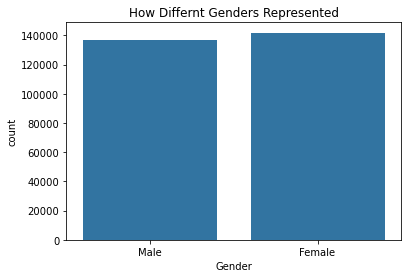

In [14]:
base_color = sb.color_palette()[0]

sb.countplot(data=df1, x='Gender', color=base_color)
plt.title('How Differnt Genders Represented');

# From Where?

The break down of the participants are unbalanced. Roughly half of students covered by the survey are participating from Europe and less than 1% from Africa.

NameError: name 'df3' is not defined

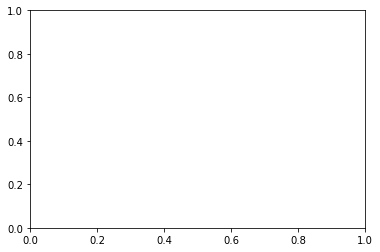

In [15]:
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']
 
fig1, ax1 = plt.subplots()
ax1.pie(df3.values, colors = colors, labels=df3.index, autopct='%1.1f%%', startangle=30)
#draw circle
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Participants Break Down by Continents', pad=32, fontsize=15)
plt.show()
#source (https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f)

# Do they have internet access?

Most of students have internet access

In [ ]:
sb.countplot(data=df1, x='Internet', color=base_color)
plt.title('Who Has internet Access');

In [ ]:
#function to plot categorical ordinal variables

def plot_percentage(df, col):
    plt.figure(figsize = [12, 5])
    ax = sb.countplot(y=col, data=df, color=base_color)
    total = len(df[col])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    return ax
#source (https://datascience.stackexchange.com/questions/48035/how-to-show-percentage-text-next-to-the-horizontal-bars-in-matplotlib)

# Do their Fathers have jobs?

Majority of students' fathers have full time jobs.

In [ ]:
#that was the basic plot in the exploratory stage
#plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,counterclock = False);


#this is the basic plot in the explanatory stage

# Creating explode data
explode = (0.1, 0.3, 0.1, 0.2)

colors = ( "orange", "cyan", "indigo", "beige")
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(sorted_counts, 
                                  autopct = lambda pct: func(pct, sorted_counts),
                                  explode = explode, 
                                  labels = sorted_counts.index,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))

plt.title('Job Status of Students\' Fathers', pad=32, fontsize=15, color = "magenta");

#source (https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/)

# What are their Mothers Education Levels?

Few mothers with no education and more than 75% of mothers have post-secondary non-tertiary education.

# International Standard Classification of Education

ISCED 0: Early childhood education.

ISCED 1: Primary education.

ISCED 2: Lower secondary education.

ISCED 3: Upper secondary education.

ISCED 4: Post-secondary non-tertiary education.

ISCED 5: Short-cycle tertiary education.

In [ ]:
plot_percentage(df1, "MotherEducation");

# Wealth vs. Index of Economics Social Cultural Status

The plots reveal a positive correlation between the wealth and the index of economics social cultural status. The overplotting of the scatter plot obscurs the distribution of the data, but this was solved by the 2D histogram. The data seems normalized to me with high concentration points around 0.

In [ ]:
cmap = sb.diverging_palette(240, 10, as_cmap=True)
plt.hist2d(data = df1, x = 'Wealth', y = 'IndexEconomicSocialCulturalStatus', cmin=0.5, cmap=cmap)
plt.colorbar()
plt.xlabel('Wealth')
plt.ylabel('IndexEconomicSocialCulturalStatus');
plt.title('Wealth vs the Index of Economics Social Cultural Status');
#source (https://classroom.udacity.com/nanodegrees/nd002-mena-nfp3/parts/211104e3-a5bc-4247-87b7-06bfa757806c/modules/884648ee-be0a-4bde-853f-26e97458edc8/lessons/22ff3b91-42f7-420e-b6ad-de0b29684ed0/concepts/8f54c142-468e-4e1a-abef-4c6425403a3b)

In [ ]:
df1.loc[df1['Country'].str.contains('(USA)'), 'Country'] = 'United States'
df1.loc[df1['Country'].str.contains('(Russian Federation)'), 'Country'] = 'Russia'
df1['Country'] = df1['Country'].str.replace('China-Shanghai','China')
df1['Country'] = df1['Country'].str.replace('-China','')
df1['Country'] = df1['Country'].str.replace('Korea','North Korea')
df1['Country'] = df1['Country'].str.replace('Chinese Taipei','Taiwan')

In [ ]:
#pip install pycountry-convert
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}

df1['continent'] = [continents[country_alpha2_to_continent_code(country_name_to_country_alpha2(country))] for country in df1.Country]

df3 = df1.groupby('continent')['continent'].count()

#source (https://stackoverflow.com/questions/55910004/get-continent-name-from-country-using-pycountry)

In [ ]:
sorted_counts = df1['FatherJobStatus'].value_counts()
sorted_counts.index

# What is the effect of the wealth on their academic perfornace?

The mode of students grade increases with the wealth consitly till grade 2. Beyond that the behavior is amazing. The best academic performance is achieved by subaverage wealth students. Also, the wealth distribution of the best academic performers is tighter that the rest and centered around -2.

In [ ]:
sb.violinplot(data=df1, x='GRADE', y='Wealth',color=base_color, innner=None);
#consistent increase of wealth mode with grades except for the highest grade that is coresponding to the least wealthy people
#distribution is tight, the best academid performance is associated with the least wealthy
plt.title('Wealth Effect on the Student Grade', pad=12, fontsize=15);

In [ ]:
sb.countplot(data = df1, x = 'Internet', hue = 'OECD');
plt.title('Who has Internet Access?', pad=12, fontsize=15);

Although Non-OECD contries representation in the data is less, still there are more people with no internet access there.

In [ ]:
g = sb.FacetGrid(data = df1, col = 'OECD', sharey=False)
g.map(plt.hist, 'Wealth')

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('How Wealth is Distributed?');

Students in OECD have wealth mode and mean above average contrary to students in Non-OECD countries.

In [ ]:
ax = sb.pointplot(data = df1, x = 'OECD', y = 'Wealth', hue = 'MotherEducation',
                  dodge = 0.3, linestyles = "")
plt.title('Mother Education Level Relation with Wealth', pad=12, fontsize=15);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title = 'Education Level');

Higher mother education level is closely related with wealth and this trend is similar across OECD and Non-OECD countries.
Also, each woman in one of OECD countries has more wealth than her peer with the same education level in Non-OECD countries.

# Grade vs. Wealth

The students grade increases with the wealth consitly till grade 2. Beyond that the behavior is amazing. The best academic performance is achieved by subaverage wealth students. Also, the wealth distribution of the best academic performers is tighter that the rest and centered around -2. Majority of top academic performance comes from Non-OECD countries.

In [ ]:
ax = sb.pointplot(data = df1, x = 'OECD', y = 'Wealth', hue = 'GRADE',
                  dodge = 0.3, linestyles = "")
plt.title('Grade Relation with Wealth', pad=12, fontsize=15);
plt.legend(loc='lower right');

In [ ]:
ax = sb.boxplot(data = df1, x = 'GRADE', y = 'Wealth', hue = 'Gender')
plt.title('Gender and Grade Relation with Wealth', pad=12, fontsize=15);

Wealth median, 25th qurtile and 75th qurtile are higher for the female students.

# How Mothers' Education Affect the students' Grades?

The students grade is increasing consitently woth the mother education level then tends to trail off at the avarage grade. Female students appear to outperform the male students.

In [ ]:
ax = sb.pointplot(data = df1, x = 'MotherEducation', y = 'GRADE', hue = 'Gender',
                  dodge = 0.3, linestyles = "")
plt.title('Mother Education Level Relation with the Grade', pad=12, fontsize=15);
plt.xticks(rotation=25);

# Main Takeaways

The data do not represent the world students equally.
Students attitude towards the importance of the study for the job does not affect their grades.
The attitude of the students towards the importance of the study for the job does not affect their grades difference from the modal grade.
Best academic performance is associated with the least wealthy students.
Higher mother education level is closely related with wealth and this trend is similar across OECD and Non-OECD countries. Also, each woman in one of OECD countries has more wealth than her peer with the same education level in Non-OECD countries.
The students grade is increasing consitently woth the mother education level then tends to trail off at the avarage grade. Female students appear to outperform the male students.

In [ ]:
!jupyter nbconvert Communicate_Findings_Explanatory.ipynb --to slides --no-input